In [1]:
%matplotlib inline

# LING 592B Fall 2019. Class 5.2 (10/30/19): Notes on reconstruction from samples

On Problem Set 3, Cobi noticed that even if you sampled above the Nyquist frequency, it didn't look like you were able to fully reconstruct the original signal.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

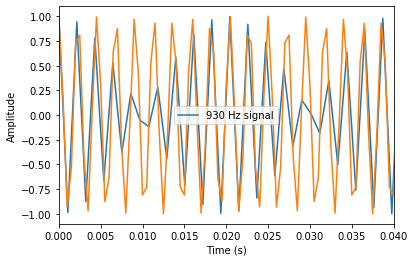

In [3]:
fs = 930
fs2 = 2000

t = np.linspace(0, 3, 3*fs+1)
y = np.cos(880*np.pi*t)
plt.xlim(0,1/25)
plt.plot(t,y)

plt.legend(["930 Hz signal"])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
x = np.linspace(0,3,3*fs2+1)
y = np.cos(880*np.pi*x)
plt.plot(x,y)


In the plot above, the blue line may have the same frequency as the orange line, but it appears to be convolved with a periodically decaying envelope. 

<StemContainer object of 3 artists>

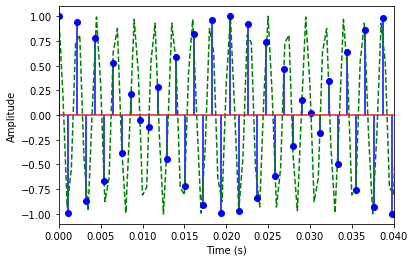

In [4]:
fs = 930
fs2 = 2000

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0,1/25)
x = np.linspace(0,3,3*fs2+1)
y_x = np.cos(880*np.pi*x)
plt.plot(x,y_x, 'g--')

t = np.linspace(0, 3, 3*fs+1)
y_t = np.cos(880*np.pi*t)
plt.stem(t,y_t, 'b', markerfmt='bo', label='fs1', use_line_collection = True)


If we plot the samples with a stem plot, does it look like we are getting 3 samples per cycle of the sinusoid? What's going on that may be giving us the "envelope" effect?

## Sinc interpolation

It turns out that how you **interpolate** between the samples is crucial to the reconstruction of the signal.

And the Sampling Theorem assumes you are doing **sinc interpolation**. What kind of interpolation were we doing above?


Here's a gist for [sinc interpolation in python](https://gist.github.com/endolith/1297227) which uses `numpy.tile`, from [this post in the sinc interpolation gist thread](https://gist.github.com/endolith/1297227#gistcomment-2113779).

In [5]:
def sinc_interp(x, s, u):
    if len(x) != len(s):
        raise ValueError('x and s must be the same length')
    
    # Find the period    
    T = s[1] - s[0]
    
    sincM = np.tile(u, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(u)))
    y = np.dot(x, np.sinc(sincM/T))
    return y

We upsample to a higher sampling rate than we sampled at and compute the values at that higher sampling rate using sinc interpolation.  And now we see that envelope effect goes away

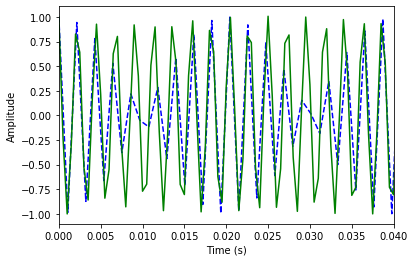

In [6]:
y_sinc = sinc_interp(y_t, t, x)


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0,1/25)
plt.plot(t,y_t,'b--')
plt.plot(x,y_sinc, 'g')




For more on the sinc function, check out the [Osgood notes](https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf), especially Chapters 2, 3, and 5.  There's also a [`numpy.sinc` function](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.sinc.html) you can play with. We may come back to the sinc function and sampling when we talk about convoluation and filtering.